In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import keras.datasets as dt
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras import Sequential
from keras.optimizers import SGD

In [2]:
# loading the data
(xtrain, ytrain), (xtest, ytest) = dt.mnist.load_data('./train')

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape, xtest.shape   # we have 28*28 pixel images

((60000, 28, 28), (10000, 28, 28))

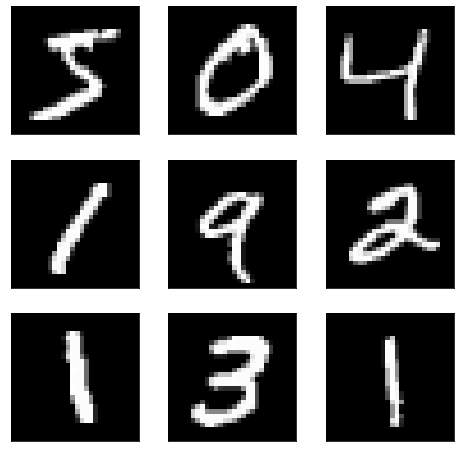

In [4]:
# plotting first few images
plt.figure(figsize=(8, 8))          #defining the figure size
for i in range(9):
  plt.subplot(3,3,i+1)              # subplot with 3 rows and 3 columns
  plt.imshow(xtrain[i],cmap = plt.get_cmap('gray'))
  plt.xticks([])                    # no markings present on x or y axis
  plt.yticks([])

In [5]:
# normalize the input
xtrain = xtrain/255
xtest = xtest/255

# reshaping the data to include that it has one channel (gray images)
xtrain = xtrain.reshape((xtrain.shape[0], 28, 28, 1))
xtest = xtest.reshape((xtest.shape[0], 28, 28, 1))

# since we have 10 outputs, we need to one hot encode our output accordingly
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [6]:
# calculate the output dimensions using: 
# dim = (height-filter+2*padding)/strides+1

model = Sequential()
model.add(Conv2D(64, kernel_size =(3,3), activation = 'relu', input_shape = (28,28,1)))
# the input shape will be 26*26

model.add(MaxPool2D(2,2))
# the input shape will be 13*13

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
# the input shape will be 11*11

model.add(MaxPool2D(2,2))
# the input shape will be 5*5

model.add(Dropout(0.2))

model.add(Flatten())
# the layer is converted to 1D for dense layer 

model.add(Dense(100, activation ='relu'))
model.add(Dense(10, activation = 'softmax'))  # 10 variables because 0-9

optim = SGD(lr = 0.01, momentum = 0.9)

model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               3

In [8]:
# define hyperparameters
batch_size = 128
epochs = 25
model.fit(xtrain, ytrain, batch_size = batch_size, verbose = 1, epochs = epochs)

Epoch 1/25
469/469 [==============================] - 36s 7ms/step - loss: 0.8803 - accuracy: 0.7246
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1076 - accuracy: 0.9674
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0773 - accuracy: 0.9760
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0606 - accuracy: 0.9810
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0490 - accuracy: 0.9849
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0404 - accuracy: 0.9875
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0379 - accuracy: 0.9880
Epoch 8/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0325 - accuracy: 0.9888
Epoch 9/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0318 - accuracy: 0.9902
Epoch 10/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0266 - accuracy: 0.991

In [9]:
score = model.evaluate(xtest, ytest, verbose = 1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0285 - accuracy: 0.9918
Test loss: 0.02852083370089531
Test accuracy: 0.9918000102043152
